<a href="https://colab.research.google.com/github/legr2000/Code-for-Eigenvalue-distribution-analysis-of-multidimensional-prolate-matrices/blob/main/Higher_dimension_eigenvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[0, 5], [6, 7]])

tensor_product = torch.kron(A, B)
print(tensor_product)

tensor([[ 0,  5,  0, 10],
        [ 6,  7, 12, 14],
        [ 0, 15,  0, 20],
        [18, 21, 24, 28]])


Give value for parameter n: 10
Give value for parameter k: 4
Give value for parameter m: 6
Time Bandwidth = 4


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


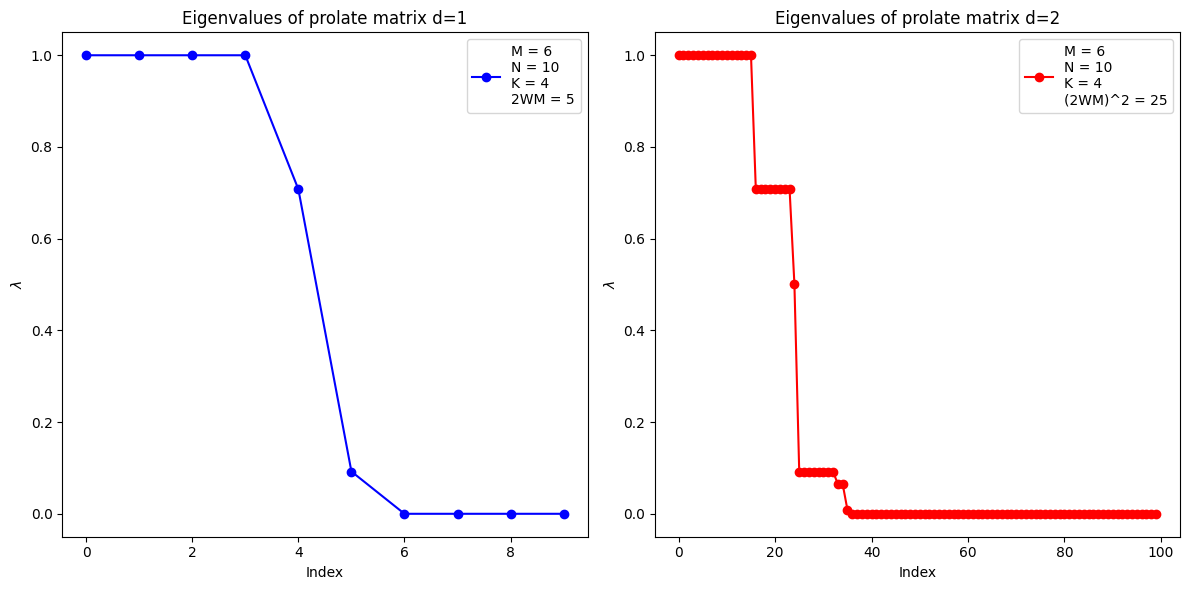

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools

def findsubsets(S, m):
    combinations = list(itertools.product(S, repeat=2))
    return combinations

def timelimit(N, M):
    matrix = np.zeros((N, N), dtype=int)
    np.fill_diagonal(matrix, [1 if i < M else 0 for i in range(N)])
    return matrix

def dft_matrix(N):
    omega = np.exp(-2j * np.pi / N)
    n = np.arange(N)
    k = n[:, None]
    return np.power(omega, k * n)

def bandlimit(N, K):
    matrix = np.zeros((N, N), dtype=int)
    np.fill_diagonal(matrix, [1 if i < K or i >= N - K else 0 for i in range(N)])
    return matrix

def idft_matrix(N):
    omega_inv = np.exp(2j * np.pi / N)
    n = np.arange(N)
    k = n[:, None]
    return np.power(omega_inv, k * n) / N

def find_eigenvalues(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    eigenvalues = np.sort(eigenvalues)[::-1]
    return np.round(eigenvalues, 5)

def plot_eigenvalues(eigenvalues, tensoreigen, M, N, K):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot eigenvalues with labels
    W=round(np.floor((2*K+1)*M/N))
    axes[0].plot(eigenvalues, 'bo-', label=f'M = {M}\nN = {N}\nK = {K} \n2WM = {W}', markersize=6)
    axes[0].set_title('Eigenvalues of prolate matrix d=1')
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel(r'$\lambda$')
    axes[0].grid(False)
    axes[0].legend(loc='upper right')


    # Plot tensor eigenvalues with labels
    Wt=W**2
    axes[1].plot(tensoreigen, 'ro-', label=f'M = {M}\nN = {N}\nK = {K} \n(2WM)^2 = {Wt}', markersize=6)
    axes[1].set_title('Eigenvalues of prolate matrix d=2')
    axes[1].set_xlabel('Index')
    axes[1].set_ylabel(r'$\lambda$')
    axes[1].grid(False)
    axes[1].legend(loc='upper right')



    # Show the plots
    plt.tight_layout()
    plt.show()

# Input values
N = int(input('Give value for parameter n: '))
K = int(input('Give value for parameter k: '))
M = int(input('Give value for parameter m: '))
W = (2 * K + 1) / (2*N)
time_bandwidth = round(2*np.floor(W * M))
print("Time Bandwidth =", time_bandwidth)

# Matrices
F = dft_matrix(N)
F_inv = idft_matrix(N)
TM = timelimit(N, M)
TK = bandlimit(N, K)
BK = F_inv @ TK @ F
A = TM @ BK @ TM

# Compute and store eigenvalues for different transformations
eigenvalues = find_eigenvalues(A)


# Generate subsets of eigenvalues of size 2
combinevalues = list(findsubsets(eigenvalues, 2))


# Tensor eigenvalues (products of pairs of eigenvalues)
tensoreigen = []
for i in range(len(combinevalues)):
    tensoreigen.append(combinevalues[i][0] * combinevalues[i][1])
tensoreigen = np.sort(tensoreigen)[::-1]


# Call the plot function
plot_eigenvalues(eigenvalues, tensoreigen,M,N,K)


In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(A)
sort_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_index]
eigenvectors = eigenvectors[:, sort_index]
print(eigenvectors.shape)
print(eigenvalues)

(10, 10)
[1.         1.         1.         1.         0.70776835 0.09223165
 0.         0.         0.         0.        ]
